<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

## ***Theme:  Regularization and Gradient Descent***


$ \ $

-------

## ***Introduction***

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse (escasa) data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`.


$ \ $

---

## ***Question $(1)$***

$ \ $

$(1)$   Import the data.


In [ ]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


$ \ $

$(2)$   Also generate approximately $100$ equally spaced $x$ data points over the range of $0$ to $1$. Using these points, calculate the $y$-data which represents the "ground truth" (the real function) from the equation $y = sin(2\pi x)$.

In [ ]:
# tomamos 100 valores entre 0 y 1 y estos valores le damos el nombre de X_real
X_real = np.linspace(0, 1, 100)
X_real

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
# tomamos los valores anteriores y aplicamos la función y = sin(2 \pi x) y guardamos esta data como
Y_real = np.sin(2 * np.pi * X_real)
Y_real

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

$ \ $

$(3)$   Plot the sparse (escasa) data ($x$ vs $y$) and the calculated ("real") data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

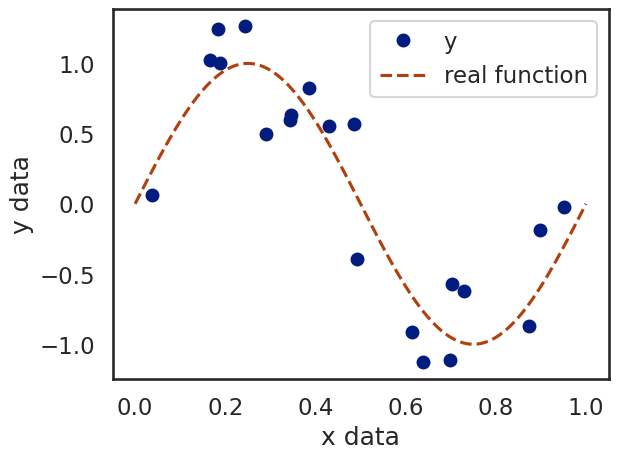

In [ ]:
# establecemos un estilo blanco
sns.set_style('white')

# establecemos un contexto de dialogo
sns.set_context('talk')

# establecemos una paleta oscura
sns.set_palette('dark')

# Plot of the noisy (sparse - escaso)-----las esferas pintadas de color azul
ax = data.plot(x = "x", ls = '', marker = 'o', label = 'data')

# la grafica de la función seno, teniendo en cuenta la data X_real y Y_real
ax.plot(X_real, Y_real, ls = '--', marker = '', label = 'real function')

# establecemos la leyenda de las graficas
ax.legend()

# establecemos el titulo de los ejes
ax.set(xlabel='x data', ylabel='y data');


$ \ $

----

## ***Question $(2)$***

The `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension $(X, 1)$, where $X$ is the length.

$ \ $

$(1)$ We charge the packages.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

$ \ $

$(2)$ Using the PolynomialFeatures class from Scikit-learn's preprocessing library, create 20th order polynomial features.

In [ ]:
pf = PolynomialFeatures(20)
lr = LinearRegression()

$ \ $

$(3)$ Extract the $X$- and $Y$- data from the dataframe.

In [ ]:
X_data = data[['x']]
Y_data = data[['y']]

$ \ $

$(4)$ Create the features and fit the model.

In [ ]:
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)

$ \ $

$(5)$ Create a prediction with ***X_poly***.

In [ ]:
Y_pred = lr.predict(X_poly)

$ \ $

$(6)$  Create a plot showing the real data and the predicted data. The predicted data is given by a linear model created previously.



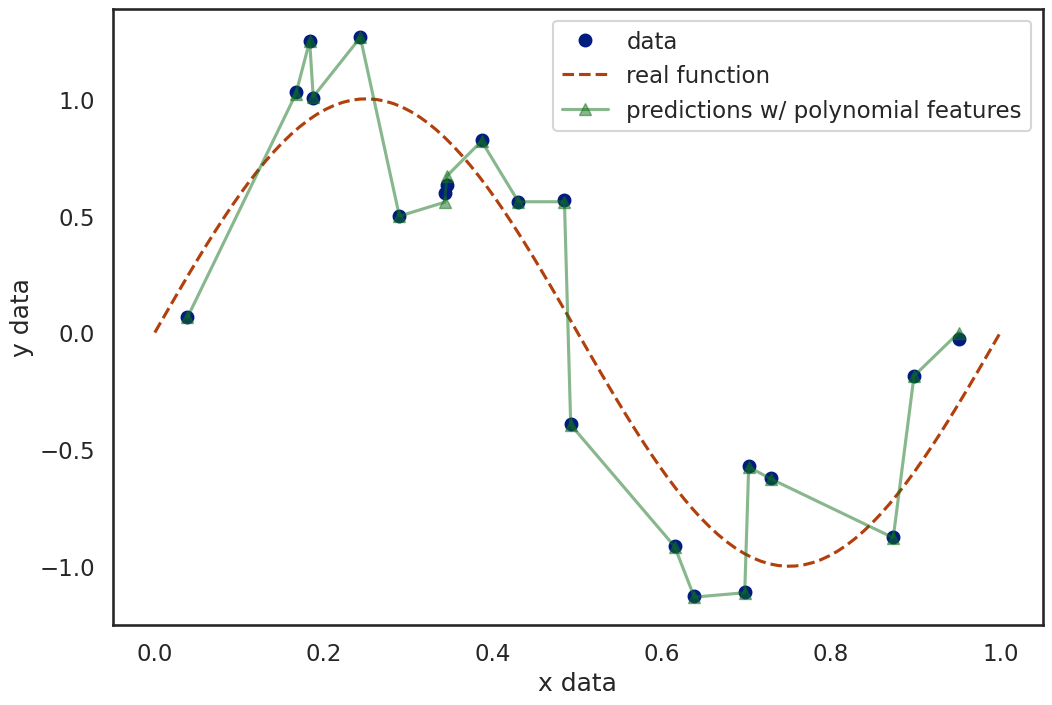

In [ ]:
#(1) describimos el tamaño del plot
plt.figure(figsize = (12,8))

#(2) Este plot son los puntos azules
plt.plot(X_data, Y_data, marker = 'o', ls = '', label = 'data', alpha = 1)

#(3) Este plot es la funcion
plt.plot(X_real, Y_real, ls = '--', label = 'real function')

#(4) Este plot son las lineas verdes
plt.plot(X_data, Y_pred, marker = '^', alpha = 0.5, label = 'predictions w/ polynomial features')

#(5) Mostramos la leyenda
plt.legend()

#(6) La función gca() en el módulo pyplot de la biblioteca matplotlib se usa para obtener la instancia actual de Axes en la figura actual que coincida con los argumentos de palabras clave dados, o crear uno.
ax = plt.gca()

#(7) mostramos las etiquetas de los ejes
ax.set(xlabel = 'x data', ylabel = 'y data');


$ \ $

----

## ***Question $(3)$***

$ \ $

$(1)$ We load the packages and we mute the warning regulation.


In [ ]:
from sklearn.linear_model import Ridge, Lasso

$ \ $

$(2)$ Mute the sklearn warning about regularization.

In [ ]:
import warnings
warnings.filterwarnings('ignore', module = 'sklearn')

$ \ $

$(3)$ We train models and then we predict data. We will do this with the Ridge  model.

In [ ]:
# Modelo de regresión ridge 
rr = Ridge(alpha = 0.001)

# Entrenamos el modelo de regresión con la data 
rr = rr.fit(X_poly, Y_data)

# predecimos un conjunto de datos usando la data X_poly en el modelo de regresión rr
Y_pred_rr = rr.predict(X_poly)

$ \ $

$(4)$ We train models and then we predict data. We will do this with the  Lasso model.

In [ ]:
#(1) Modelo de regresión lasso
lassor = Lasso(alpha = 0.0001)

#(2) Entrenamos el modelo de regresión lassor con la data X_poly y Y_data
lassor = lassor.fit(X_poly, Y_data)

#(3) Predecimos un conjunto de datos con el modelo de regresión lassor usando la data X_poly
Y_pred_lr = lassor.predict(X_poly)

$ \ $

$(5)$ We make a plot comparing the models we have studied.

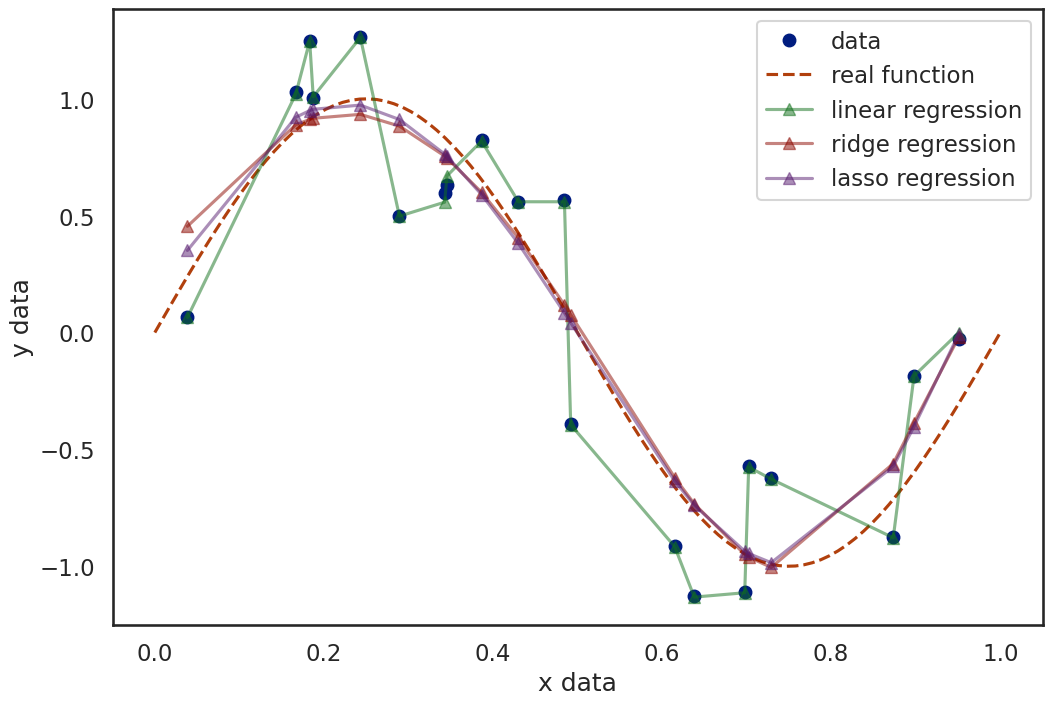

In [ ]:
# describimos el tamaño del plot
plt.figure(figsize = (12,8)) 

# Mostramos las esferas azules. Esta es la data completa.
plt.plot(X_data, Y_data, marker = 'o', ls = '', label = 'data')

# Mostramos la función descrita en forma punteada con color naranja. Mostramos la data descrita con la funcion seno.
plt.plot(X_real, Y_real, ls = '--', label = 'real function')

# Mostramos la función en color verde con triangulos. Aqui mostramos la data predecida con el modelo de regresion lineal.
plt.plot(X_data, Y_pred, label = 'linear regression', marker = '^', alpha = 0.5)

# Mostramos la función en color naranja con triangulos. Aqui mostramos la data predecida con el modelo ridge.
plt.plot(X_data, Y_pred_rr, label = 'ridge regression', marker = '^', alpha = 0.5)

# Mostramos la función en color morado con triangulos. Aqui mostramos la data predecida con el modelo lasso.
plt.plot(X_data, Y_pred_lr, label = 'lasso regression', marker = '^', alpha = 0.5)

# Mostramos la leyenda
plt.legend()

# La función gca() en el módulo pyplot de la biblioteca matplotlib se usa para obtener la instancia actual de Axes en la figura actual que coincida con los argumentos de palabras clave dados, o crear uno.
ax = plt.gca()

# Mostrmos las etiquetas de los ejes
ax.set(xlabel = 'x data', ylabel = 'y data');

$ \ $

$(4)$  We compare our models numerically.

In [ ]:
lr.coef_.ravel()

array([ 7.11107415e+12,  1.61390704e+07, -4.64568151e+08,  7.65710822e+09,
       -8.24801190e+10,  6.21740278e+11, -3.40777406e+12,  1.38568154e+13,
       -4.20422189e+13,  9.42057533e+13, -1.50175421e+14,  1.52376975e+14,
       -5.48449233e+13, -8.97815012e+13,  1.41772483e+14, -3.62554337e+13,
       -1.15420776e+14,  1.65026996e+14, -1.06810523e+14,  3.61418724e+13,
       -5.18879378e+12])

In [ ]:
rr.coef_.ravel()

array([  0.        ,   6.065176  , -12.42963492,  -4.07012661,
         2.30719442,   4.43254976,   4.13519998,   2.88350728,
         1.48463604,   0.30792676,  -0.52276669,  -1.00835922,
        -1.20467118,  -1.1842723 ,  -1.01727186,  -0.76299398,
        -0.4675777 ,  -0.16454396,   0.12336262,   0.3819731 ,
         0.60359108])

In [ ]:
lassor.coef_.ravel()

array([ 0.00000000e+00,  8.49049951e+00, -2.01767083e+01,  1.64135271e+00,
        5.69848812e+00,  4.60193904e+00,  2.17090495e+00,  2.52180755e-01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -6.95109030e-01,
       -6.99207087e-01, -5.69071337e-01, -2.79483479e-01, -4.92199451e-02,
       -4.87309470e-02, -1.32960483e-01, -7.09843487e-03, -0.00000000e+00,
       -0.00000000e+00])

$ \ $

$(5)$  We compare our models graphically.

[Text(0, 0.5, 'ridge and lasso regression')]

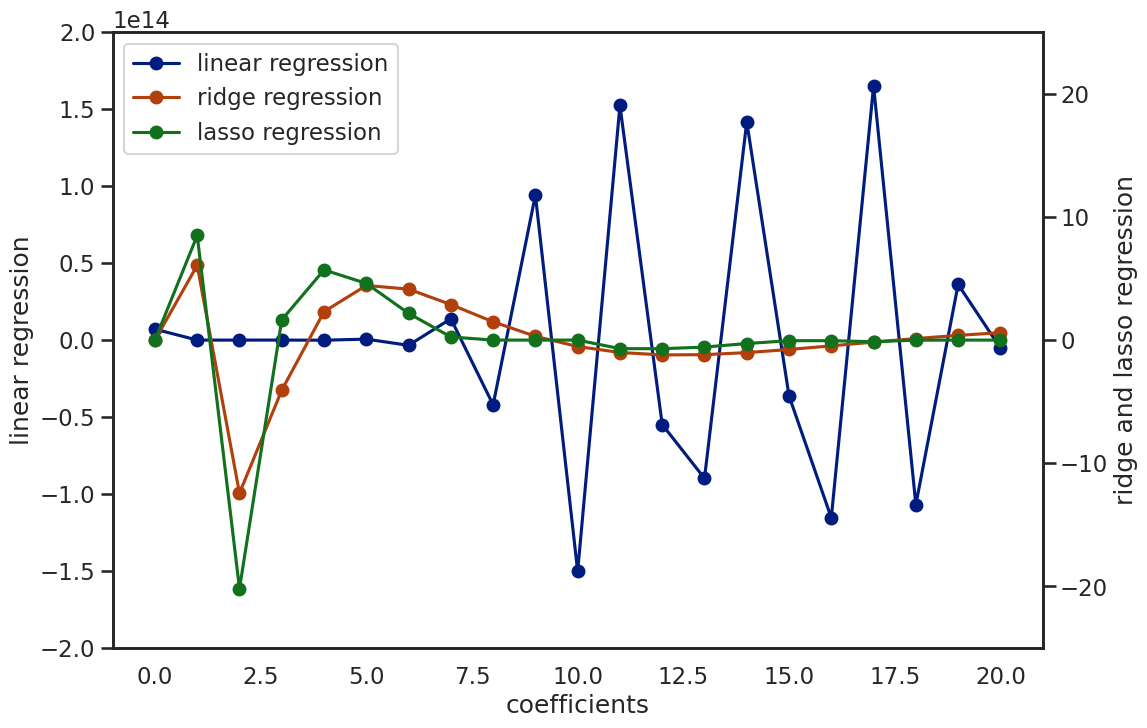

In [ ]:
# describimos el tamaño del plot
plt.figure(figsize = (12,8))

# Establecemos la paleta de colores
colors = sns.color_palette()

# Configuramos el dual eje y
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
# lr = LinearRegression()
ax1.plot(lr.coef_.ravel(), color = colors[0], marker = 'o', label = 'linear regression')

# Plot the Ridge data sets
# rr = Ridge(alpha=0.001)
ax2.plot(rr.coef_.ravel(), color = colors[1], marker = 'o', label = 'ridge regression')

# Plot the lasso data sets
# lassor = Lasso(alpha=0.0001)
ax2.plot(lassor.coef_.ravel(), color = colors[2], marker = 'o', label = 'lasso regression')

# personalizamos la escala de los ejes
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combinamos las leyendas
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2)

# Establecemos las etiquetas de los ejes
ax1.set(xlabel = 'coefficients', ylabel = 'linear regression')
ax2.set(ylabel = 'ridge and lasso regression')

$ \ $

$(5)$ We create a dataframe with the basic statistics of the coefficients of our models.

In [ ]:
# creamos un dataframe vacio
coefficients = pd.DataFrame()

# creamos una columna para el dataframe creado llamada 'linear regression'
# lr = LinearRegression()
coefficients['linear regression'] = lr.coef_.ravel()

# creamos una columna para el dataframe creado llamada 'ridge regression'
# rr = Ridge(alpha=0.001)
coefficients['ridge regression'] = rr.coef_.ravel()

# creamos una columna para el dataframe creado llamada 'lasso regression'
# lassor = Lasso(alpha=0.0001)
coefficients['lasso regression'] = lassor.coef_.ravel() 

In [ ]:
# aplicamos la función valor absoluto a cada uno de los coeficientes del dataframe llamado coefficients
coefficients = coefficients.applymap(abs)

# describimos los primeros elementos del dataframe coefficients
coefficients.describe()  

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.786341e+13,2.169397,2.167284
std,6.005692e+13,2.900278,4.706731
min,1.613907e+07,0.000000,0.000000
25%,3.407774e+12,0.467578,0.000000
50%,3.625543e+13,1.017272,0.252181
75%,1.068105e+14,2.883507,1.641353
max,1.650270e+14,12.429635,20.176708


$ \ $

---

## ***Question $(4)$***

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features. To begin:

$ \ $

$(1)$   Import the data with Pandas.

In [ ]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


$ \ $

$(2)$ Create a list of categorial data.

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
# filtering by string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  
one_hot_encode_cols

Alley            object
BldgType         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
BsmtQual         object
CentralAir       object
Condition1       object
Condition2       object
Electrical       object
ExterCond        object
ExterQual        object
Exterior1st      object
Exterior2nd      object
Fence            object
FireplaceQu      object
Foundation       object
Functional       object
GarageCond       object
GarageFinish     object
GarageQual       object
GarageType       object
Heating          object
HeatingQC        object
HouseStyle       object
KitchenQual      object
LandContour      object
LandSlope        object
LotConfig        object
LotShape         object
MSZoning         object
MasVnrType       object
MiscFeature      object
Neighborhood     object
PavedDrive       object
PoolQC           object
RoofMatl         object
RoofStyle        object
SaleCondition    object
SaleType         object
Street          

In [ ]:
# list of categorical fields
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  
one_hot_encode_cols

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

$ \ $

$(2)$ Here we see another way of one-hot-encoding. For doing this we have the following steps:

$ \ $

$(a)$ We encode the categorical columns of the dataframe ***data***, This is done using the ***pd.Categorical()*** function on every categorical column.

In [ ]:
# Encode these columns as categoricals so one hot encoding works on split data (if desired). This process really doesnt do anything to the dataframe apparently..
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

$ \ $

$(b)$ Do the one hot encoding.

In [ ]:
# Do the one hot encoding
data = pd.get_dummies(data, columns = one_hot_encode_cols)
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0,0,0,0,0,1,0,1,1,0


$ \ $

$(3)$ Next, split the data in train and test data sets.

$ \ $

$(a)$ Import the necessary packages.

In [ ]:
from sklearn.model_selection import train_test_split

$ \ $

$(b)$ We separate the data in 2 parts.

In [ ]:
train, test = train_test_split(data, test_size = 0.3, random_state = 42)

$ \ $

$(4)$ Create a list of float colums.


In [ ]:
mask = (data.dtypes == np.float)
float_cols = data.columns[mask]
float_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')

$ \ $

$(5)$ We check the skew on the dataframe ***`train`*** taking the columns ***float_cols***.

In [ ]:
skew_vals = train[float_cols].skew()
skew_vals

1stFlrSF          1.539692
2ndFlrSF          0.773655
3SsnPorch        10.150612
BsmtFinSF1        2.010766
BsmtFinSF2        4.466378
BsmtUnfSF         0.900308
EnclosedPorch     3.218303
GarageArea        0.838422
GarageYrBlt      -0.649707
GrLivArea         1.455564
LotArea          11.501694
LotFrontage       3.138032
LowQualFinSF     11.210638
MasVnrArea        2.492814
MiscVal          26.915364
OpenPorchSF       2.295489
PoolArea         15.777668
ScreenPorch       4.599803
TotalBsmtSF       1.979164
WoodDeckSF        1.334388
SalePrice         2.106910
dtype: float64

$ \ $

$(6)$ We sort the previous result in an descending way and we transform it in a dataframe.

In [ ]:
skew_cols = (skew_vals
                      .sort_values(ascending = False)
                      .to_frame()
                      .rename(columns={0:'Skew'})
                      .query('abs(Skew) > {0}'.format(0.75)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


$ \ $

$(7)$ Transform the column "BsmtFinSF1" using the ***np.log1p*** function.

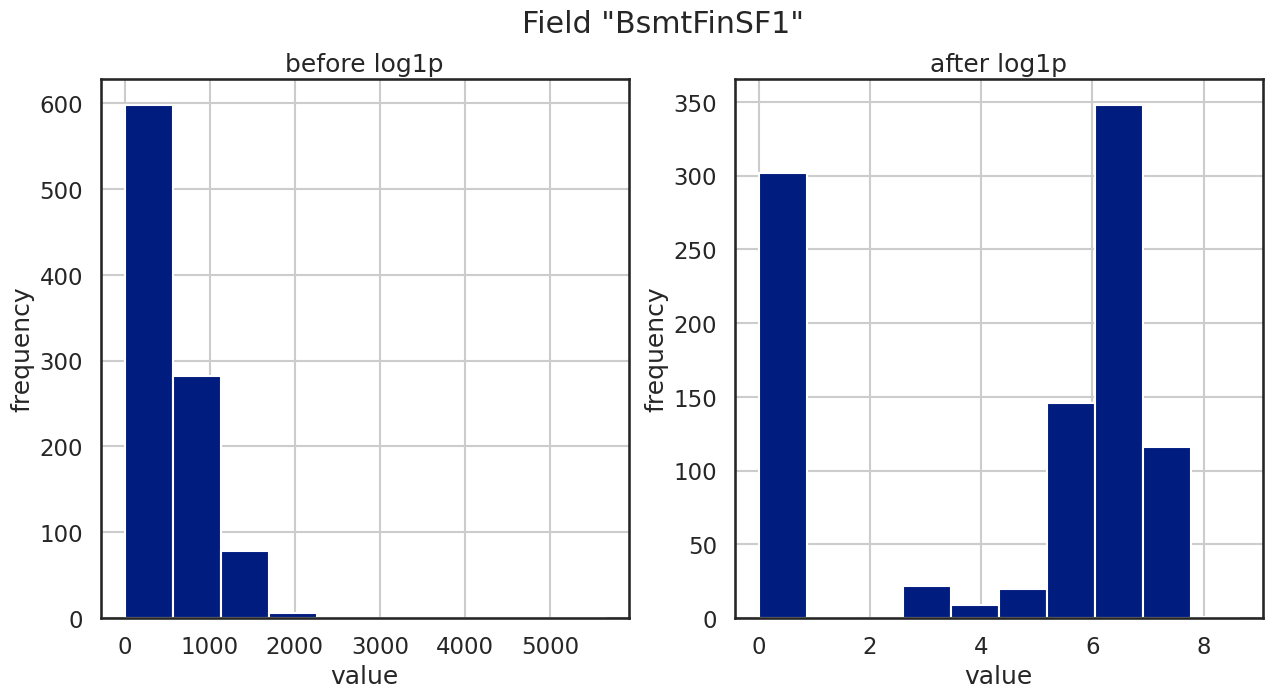

In [ ]:
#(1) Configuramos el tamaño de la imagen y hacemos que tenga dos plots
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize = (15, 7))

#(2) Mostramos un histograma de train["BsmtFinSF1"] en la posición ax_before
# train, test = train_test_split(data, test_size = 0.3, random_state = 42)
train["BsmtFinSF1"].hist(ax = ax_before)

#(3) Transformamos la data train["BsmtFinSF1"] usando la función np.log1p y mostramos un histograma en la posición ax_after
train["BsmtFinSF1"].apply(np.log1p).hist(ax = ax_after)

#(4) Establecemos el titulo del plot ax_before, junto con  las etiquetas de los ejes 
ax_before.set(title = 'before log1p', xlabel = 'value', ylabel = 'frequency')

#(5) Establecemos el titulo del plot ax_after, junto con las etiquetas de los ejes 
ax_after.set(title = 'after log1p', xlabel = 'value', ylabel = 'frequency')

#(6) Establecemos un titulo para la imagen completa
fig.suptitle('Field "BsmtFinSF1"');

$ \ $

$(8)$ Mute the setting (ajuste) with a copy warnings (Silenciar la configuración con advertencias de copia)

In [ ]:
columnas = skew_cols.index.tolist()
columnas

['MiscVal',
 'PoolArea',
 'LotArea',
 'LowQualFinSF',
 '3SsnPorch',
 'ScreenPorch',
 'BsmtFinSF2',
 'EnclosedPorch',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'SalePrice',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF',
 'GarageArea',
 '2ndFlrSF']

$ \ $

$(9)$ We transform the columns diferentes from "Saleprice" using the function ***np.log1p***.

In [ ]:
for col in columnas:
    # si col == "SalePrice", saltamos al siguiente elemento
    if col == "SalePrice":
        continue

    # si col != "SalePrice" transformamos nuestros datos
    test[col]  = test[col].apply(np.log1p)  
    train[col] = np.log1p(train[col])   

$ \ $

$(10)$ Separate features from predictor.

In [ ]:
# creamos una lista con las columnas del dataframe train que sean diferentes de 'SalePrice'
feature_cols = [x for x in train.columns if x != 'SalePrice']

In [ ]:
# creamos un dataframe con la data train y las columnas feature_cols
X_train = train[feature_cols]

# extraemos la columna 'SalePrice' del dataframe train
y_train = train['SalePrice']

In [ ]:
# creamos un dataframe con la data test y las columnas feature_cols
X_test  = test[feature_cols]

# extraemos la columna 'SalePrice' del dataframe test
y_test  = test['SalePrice']

$ \ $

-----

## ***Question $(5)$***

$(1)$ Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.

$ \ $

$(a)$ We import a necessary function of the library sklearn.


In [ ]:
from sklearn.metrics import mean_squared_error

$ \ $

$(b)$ We define the function.

In [ ]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

$ \ $

$(2)$  Fit a basic linear regression model.

$ \ $

$(a)$ We import a necessary function of the library ***sklearn.linear_model***.

In [ ]:
from sklearn.linear_model import LinearRegression 

$ \ $

$(b)$ We create and train our linear model.

In [ ]:
linearRegression = LinearRegression().fit(X_train, y_train)

$ \ $

$(3)$   We predict a dataset of our linear model and print the root-mean-squared error of the predicted data and the test data.

In [ ]:
y_pred = linearRegression.predict(X_test)

linearRegression_rmse = rmse(y_test, y_pred)

linearRegression_rmse

306369.68342319364

$ \ $

$(4)$  Plot the predicted vs actual sale price based on the model.

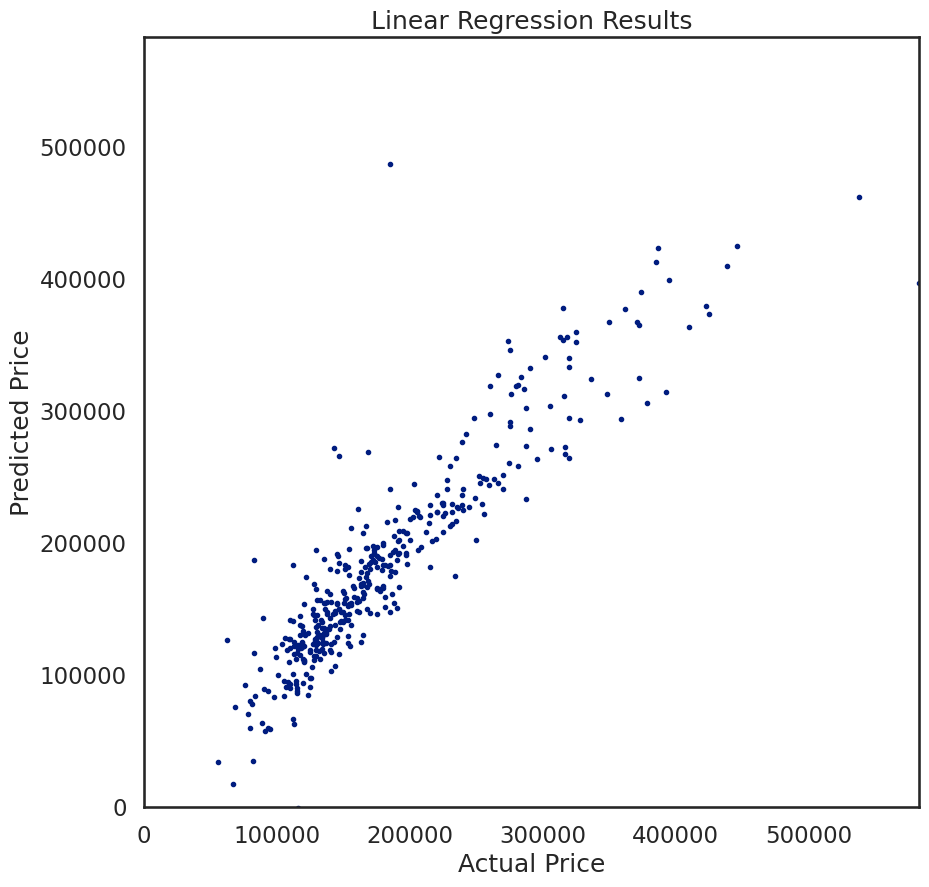

In [ ]:
# creamos un plot con dimensiones figsize = (10,10)
f = plt.figure(figsize = (10,10))

# describimos ax como los ejes del plot
ax = plt.axes()

# predecimos un conjunto de datos con el objeto de tipo regresion lineal y la data X_test
y_pred = linearRegression.predict(X_test)

# describimos un plot sobre ax  teniendo en cuenta la data
ax.plot(y_test, y_pred, marker = 'o', ls = '', ms = 3.0)

# establecemos un intervalo de trabajo
lim = (0, y_test.max())

# Establecemos etiquetas para los ejes, describimos los limites para el eje x y el eje y y por ultimo describimos el titulo
ax.set(xlabel = 'Actual Price', 
       ylabel = 'Predicted Price', 
       xlim = lim,
       ylim = lim,
       title = 'Linear Regression Results');

$ \ $

-----

## ***Question $(6)$***

Ridge regression uses $L^2$ normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

$ \ $

$(1)$  Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the $RMSE$ using the cross validated error function you created above.


*  Use $[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$ as the range of alphas.


*  Repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.


In [ ]:
from sklearn.linear_model import RidgeCV 

In [ ]:
#(1) Describimos los posibles valores de alpha
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

#(2.1) Creamos un modelo Ridge usando la lista alphas y tomando cv = 4
#(2.2) Entrenamos este modelo teniendo en cuenta la data X_train, y_train
ridgeCV = RidgeCV(alphas = alphas, cv = 4).fit(X_train, y_train)

#(3) predecimos un conjunto de valores con el modelo ridgeCV y la data X_test
y_pred = ridgeCV.predict(X_test)

#(4)  describimos la función rmse sobre la data de prueba y_test y la data predecida y_pred
ridgeCV_rmse = rmse(y_test, y_pred)
ridgeCV_rmse

32169.176205672444

In [ ]:
# mostramos en pantalla algunos resultados
print(ridgeCV.alpha_ , ridgeCV_rmse)

15.0 32169.176205672444


Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.


$ \ $

-----

## ***Question $(7)$***

$(1)$ Much like (Muy parecido) the `RidgeCV` function, there is also a `LassoCV` function that uses an $L^{1}$ regularization function and cross-validation. $L^{1}$ regularization will selectively shrink some coefficients, effectively performing feature elimination.

$ \ $

$(2)$ The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

$ \ $

$(3)$ Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of $L^{2}$ and $L^{1}$ regularization.

*   Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the $RMSE$ using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.

*   Repeat this with the Elastic net model.

*   Compare the results via table and/or plot.

$ \ $

$(4)$ Use the following alphas: `[1e-5, 5e-5, 0.0001, 0.0005]`


In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005]) 

In [ ]:
# creamos un objeto de tipo lassoCV con la data alpha2  y luego entrenamos ese objeto con la data X_train, y_train
lassoCV = LassoCV(alphas = alphas2,  max_iter = 1000, cv = 3).fit(X_train, y_train)

# predecimos un conjunto de datos con lassoCV
y_pred = lassoCV.predict(X_test)

# usamos la función rmse sobre y_test y y_pred
lassoCV_rmse = rmse(y_test, y_pred)
lassoCV_rmse

47347.6242191395

In [ ]:
print(lassoCV.alpha_, lassoCV_rmse)  

0.0005 47347.6242191395


$ \ $

$(5)$ We can determine how many of these features remain non-zero.


In [ ]:
print(f'Of {len(lassoCV.coef_)} coefficients, {len(lassoCV.coef_.nonzero()[0])} are non-zero with Lasso.')

Of 294 coefficients, 281 are non-zero with Lasso.


$ \ $

$(6)$ Now try the elastic net, with the same alphas as in Lasso, and $L^{1}$  ratios between $0.1$ and $0.9$.


In [ ]:
# importamos ElasticNetCV de sklearn.linear_model
from sklearn.linear_model import ElasticNetCV

# describimos 9 numeros entre 0.1 y 0.9
l1_ratios = np.linspace(0.1, 0.9, 9)

# ElasticNetCV es un modelo de red elástica con ajuste iterativo a lo largo de una trayectoria de regularización. En este caso, usamos las siguientes variables:
# alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005]) 
# l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas = alphas2, l1_ratio = l1_ratios, max_iter = 1000).fit(X_train, y_train)

# predecimos un conjunto de valores con elasticNetCV y la data X_test
y_pred = elasticNetCV.predict(X_test)

# calculamos el rmse (desviación estándar de los valores residuales). 
# Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales.
elasticNetCV_rmse = rmse(y_test, y_pred)

# mostramos en pantalla algunos resultados  
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 35001.03098314852


$ \ $

$(7)$ Comparing the $RMSE$ calculation from all models is easiest in a table.


In [ ]:
# linearRegression_rmse = rmse(y_test, y_pred)
# ridgeCV_rmse = rmse(y_test, y_pred)
# lassoCV_rmse = rmse(y_test, y_pred)
# elasticNetCV_rmse = rmse(y_test, y_pred)
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

# describimos una lista con los anteriores modelos
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

In [ ]:
# creamos una serie y luego la transformamos en un dataframe
rmse_df = pd.Series(rmse_vals, index = labels).to_frame()
rmse_df

,0
Linear,306369.683423
Ridge,32169.176206
Lasso,47347.624219
ElasticNet,35001.030983


In [ ]:
# cambiamos el nombre de la columna de resultados
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,306369.683423
Ridge,32169.176206
Lasso,47347.624219
ElasticNet,35001.030983


$ \ $

$(8)$ We can also make a plot of actual $\underline{\text{vs}}$  predicted housing prices as before.


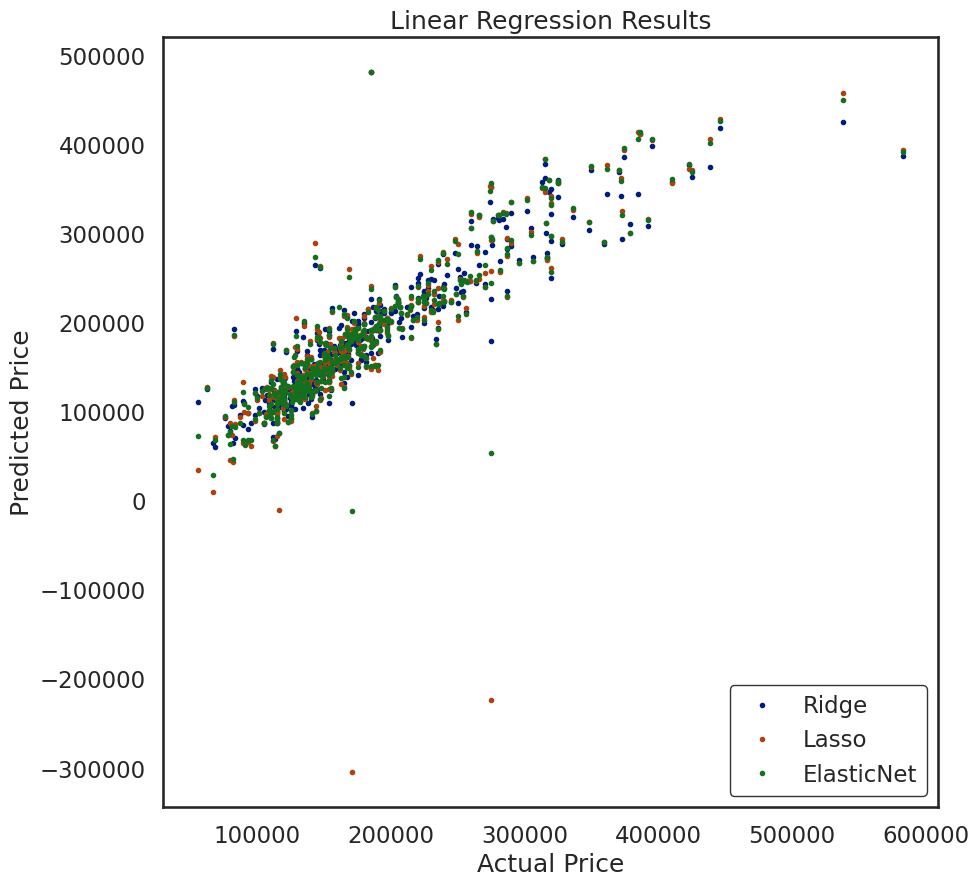

In [ ]:
# creamos una imagen y especificamos el tamaño
f = plt.figure(figsize = (10,10))

# creamos los ejes de nuestra imagen
ax = plt.axes()

# creamos una lista con los modelos 'Ridge', 'Lasso', 'ElasticNet'
labels = ['Ridge', 'Lasso', 'ElasticNet']

# ridgeCV = RidgeCV(alphas = alphas, cv = 4).fit(X_train, y_train)
# lassoCV = LassoCV(alphas = alphas2,  max_iter = 1000, cv = 3).fit(X_train, y_train)
# elasticNetCV = ElasticNetCV(alphas = alphas2, l1_ratio = l1_ratios, max_iter = 1000).fit(X_train, y_train)
models = [ridgeCV, lassoCV, elasticNetCV]

# creamos un conjunto de 3 plots teniendo en cuenta los 3 diferentes modelos a considerar
for (mod, lab) in zip(models, labels):
    # datos de prueba = y_test
    # datos predecidos = mod.predict(X_test)
    # la forma del plot es con esferas
    y_pred = mod.predict(X_test)
    ax.plot(y_test, y_pred, marker = 'o', ls = '', ms = 3.0, label = lab)

# mostramos la leyenda 
leg = plt.legend(frameon = True)

# personalizamos la leyenda
leg.get_frame().set_edgecolor('black')

# personalizamos la leyenda
leg.get_frame().set_linewidth(1.0)

# establecemos las etiquetas de los ejes y el titulo del plot
ax.set(xlabel = 'Actual Price', ylabel = 'Predicted Price', title = 'Linear Regression Results');

$ \ $

-----

## ***Question $(8)$***

Let's explore Stochastic gradient descent in this exercise. Recall that Linear models in general are sensitive to scaling. However, SGD (Stochastic gradient descent) is *very* sensitive to scaling. Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

$ \ $

$(1)$   Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).

$ \ $

$(2)$   Now fit stochastic gradient descent models with each of the three penalties ($L^{2}$, $L^{1}$, Elastic Net) using the parameter values determined by cross validation above.

$ \ $

$(3)$   Do not scale the data before fitting the model.

$ \ $

$(4)$   Compare the results to those obtained without using stochastic gradient descent.


In [ ]:
# Import SGDRegressor and prepare the parameters
from sklearn.linear_model import SGDRegressor

In [ ]:
# creamos un diccionario donde describamos los parametros de los modelos a trabajar
model_parameters_dict = {'Linear': {'penalty': 'l1'},
                         'Lasso': {'penalty': 'l2', 'alpha': lassoCV.alpha_},
                         'Ridge': {'penalty': 'l1', 'alpha': ridgeCV_rmse},
                         'ElasticNet': {'penalty': 'elasticnet', 'alpha': elasticNetCV.alpha_, 'l1_ratio': elasticNetCV.l1_ratio_}}

In [ ]:
list(model_parameters_dict.items())

[('Linear', {'penalty': 'l1'}),
 ('Lasso', {'penalty': 'l2', 'alpha': 0.0005}),
 ('Ridge', {'penalty': 'l1', 'alpha': 32169.176205672444}),
 ('ElasticNet', {'penalty': 'elasticnet', 'alpha': 0.0005, 'l1_ratio': 0.1})]

In [ ]:
for (modellabel, parameters) in model_parameters_dict.items():
  print(parameters)

{'penalty': 'l1'}
{'penalty': 'l2', 'alpha': 0.0005}
{'penalty': 'l1', 'alpha': 32169.176205672444}
{'penalty': 'elasticnet', 'alpha': 0.0005, 'l1_ratio': 0.1}


In [ ]:
# creamos una diccionario vacio, para empezar a llenarlo con cierta data
new_rmses = {}

# Realizamos una iteración sobre los items del diccionario
for (modellabel, parameters) in model_parameters_dict.items():

    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)

    # entrenamos nuestro modelo con la data X_train, y_train
    SGD.fit(X_train, y_train)

    # predecimos un conjunto de valores con la data X_test y el modelo SGD
    y_pred = SGD.predict(X_test)

    # creamos un elemento en el diccionario vacio con la data de prueba y_test y la data predecida y_pred
    new_rmses[modellabel] = rmse(y_test, y_pred)

In [ ]:
rmse_df

,RMSE
Linear,306369.683423
Ridge,32169.176206
Lasso,47347.624219
ElasticNet,35001.030983


In [ ]:
#  creamos una nueva columna para nuestro dataframe teniendo en cuenta los resultados obtenidos anteriormente
rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,306369.683423,9.889779e+15
Ridge,32169.176206,1.013915e+15
Lasso,47347.624219,8.562155e+15
ElasticNet,35001.030983,1.220360e+15


$ \ $

----

## ***Remark***

Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

*   Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.

*   Re-compute the errors for all the penalties and compare.


In [ ]:
# Import SGDRegressor and prepare the parameters
from sklearn.linear_model import SGDRegressor

In [ ]:
# creamos un diccionario donde especificamos nuestros modelos
model_parameters_dict = {'Linear': {'penalty': 'l1'},
                         'Lasso': {'penalty': 'l2',
                         'alpha': lassoCV.alpha_},
                         'Ridge': {'penalty': 'l1',
                         'alpha': ridgeCV_rmse},
                         'ElasticNet': {'penalty': 'elasticnet', 
                         'alpha': elasticNetCV.alpha_,
                         'l1_ratio': elasticNetCV.l1_ratio_}}

In [ ]:
# creamos un diccionario vacio para ir llenandolo con la data que necesitamos 
new_rmses = {}

# realizamos una iteración sobre los items de model_parameters_dict
for (modellabel, parameters) in model_parameters_dict.items():

    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0 = 1e-7, **parameters)

    # entrenamos el modelo con la data X_train, y_train
    SGD.fit(X_train, y_train)

    # predecimos un conjunto de datos tomando como data a X_test sobre el modelo SGD
    y_pred = SGD.predict(X_test)

    # creamos un nuevo elemento en el diccionario teniendo en cuenta el modelo rmse y la data y_test, y_pred
    new_rmses[modellabel] = rmse(y_test, y_pred)

    # mostramos en pantalla el diccionario creado
    new_rmses

In [ ]:
# creamos una nueva columna sobre el dataframe rmse_df teniendo en cuenta la data new_rmses creada anteriormente
rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,306369.683423,9.889779e+15,74143.370601
Ridge,32169.176206,1.013915e+15,79758.693249
Lasso,47347.624219,8.562155e+15,79448.580238
ElasticNet,35001.030983,1.220360e+15,75216.136295


$ \ $

-----

## ***Scale the data and do it again***

Now let's scale our training data and try again.

*   Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.

*   Using the scaler, transform `X_test` and create a variable `X_test_scaled`.

*   Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.


In [ ]:
# importamos la función MinMaxScaler para escalar nuestra data
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# usamos la funcion MinMaxScaler() para crear un modelo que escale nuestra data
scaler = MinMaxScaler()

# entrenamos nuestro modelo con la data X_train
X_train_scaled = scaler.fit_transform(X_train)

# creamos un conjunto de datos con nuestro modelo entrenado y la data de prueba X_test
X_test_scaled = scaler.transform(X_test)

# creamos un diccionario vacio para introducir cierta data 
new_rmses = {}

# realizamos una iteración sobre los items de model_parameters_dict
for (modellabel, parameters) in model_parameters_dict.items():

    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)

    # entrenamos nuestro modelo teniendo en cuenta la data predecida (X_train_scaled) y la data entrenada (y_train)
    SGD.fit(X_train_scaled, y_train)

    # añadimos esta data a nuestro diccionario
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

In [ ]:
# creamos una nueva columna para nuestro dataframe
rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,306369.683423,9.889779e+15,74143.370601,32930.643904
Ridge,32169.176206,1.013915e+15,79758.693249,77777.353978
Lasso,47347.624219,8.562155e+15,79448.580238,32840.120894
ElasticNet,35001.030983,1.220360e+15,75216.136295,32841.407665


In [ ]:
# usamos la funcion MinMaxScaler() para crear un modelo que escale nuestra data
scaler = MinMaxScaler()

# entrenamos nuestro modelo con la data X_train
X_train_scaled = scaler.fit_transform(X_train)

# creamos un conjunto de datos con nuestro modelo entrenado y la data de prueba X_test
X_test_scaled = scaler.transform(X_test)

# creamos un diccionario vacio para introducir cierta data 
new_rmses = {}

# realizamos una iteración sobre los items de model_parameters_dict
for (modellabel, parameters) in model_parameters_dict.items():

    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)

    # entrenamos nuestro modelo teniendo en cuenta la data predecida (X_train_scaled) y la data entrenada (y_train)
    SGD.fit(X_train_scaled, y_train)

    # añadimos esta data a nuestro diccionario
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

In [ ]:
# creamos una nueva columna para nuestro dataframe
rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,306369.683423,9.889779e+15,74143.370601,32937.535942
Ridge,32169.176206,1.013915e+15,79758.693249,77778.190855
Lasso,47347.624219,8.562155e+15,79448.580238,32822.619043
ElasticNet,35001.030983,1.220360e+15,75216.136295,32884.468060
